In [2]:
import pandas as pd
from tensorflow import keras
from keras.models import *
from keras.layers import *
import tensorflow.keras.utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model
from numpy import argmax
from keras import datasets
import matplotlib.pyplot as plt


In [3]:
(x_train,y_train),(x_test,y_test)= datasets.cifar10.load_data()

In [4]:
cifar=datasets.cifar10.load_data()

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3,random_state=42)

In [6]:
x_train=x_train/255
x_test=x_test/255

In [7]:
(x_train.shape,x_test.shape)

((35000, 32, 32, 3), (10000, 32, 32, 3))

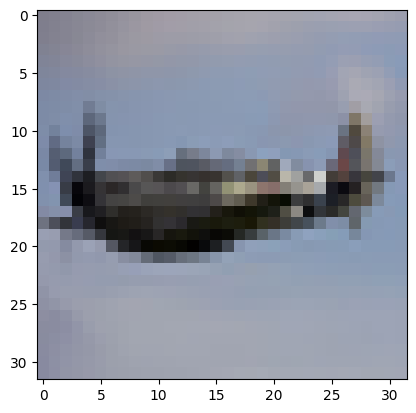

In [8]:
plt.imshow(x_train[20],cmap='gray')

In [9]:
y_train[20]

array([0], dtype=uint8)

In [10]:
ANN_mnist=Sequential()
ANN_mnist.add(Input(shape=(32,32,3)))
ANN_mnist.add(Flatten())
ANN_mnist.add(Dense(256,activation='relu'))
ANN_mnist.add(Dense(120,activation='relu'))
ANN_mnist.add(Dense(10,activation='softmax'))
ANN_mnist.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 120)               30840     
                                                                 
 dense_2 (Dense)             (None, 10)                1210      
                                                                 
Total params: 818738 (3.12 MB)
Trainable params: 818738 (3.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
ANN_mnist.compile(loss='sparse_categorical_crossentropy', optimizer ='Adam',metrics=['accuracy'])
var=ANN_mnist.fit(x_train,y_train,epochs=10,verbose=2,validation_data=(x_val,y_val),callbacks=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True))

NameError: ignored

Epoch 1/10
1094/1094 - 25s - loss: 1.9137 - accuracy: 0.3069 - val_loss: 171.1094 - val_accuracy: 0.3334 - 25s/epoch - 23ms/step
Epoch 2/10
1094/1094 - 20s - loss: 1.7288 - accuracy: 0.3770 - val_loss: 167.1317 - val_accuracy: 0.3905 - 20s/epoch - 18ms/step
Epoch 3/10
1094/1094 - 16s - loss: 1.6499 - accuracy: 0.4088 - val_loss: 221.0874 - val_accuracy: 0.3810 - 16s/epoch - 14ms/step
Epoch 4/10
1094/1094 - 16s - loss: 1.5921 - accuracy: 0.4311 - val_loss: 179.1110 - val_accuracy: 0.4309 - 16s/epoch - 14ms/step
Epoch 5/10
1094/1094 - 15s - loss: 1.5486 - accuracy: 0.4472 - val_loss: 208.5002 - val_accuracy: 0.4055 - 15s/epoch - 14ms/step
Epoch 6/10
1094/1094 - 15s - loss: 1.5203 - accuracy: 0.4577 - val_loss: 204.1095 - val_accuracy: 0.4273 - 15s/epoch - 14ms/step
Epoch 7/10
1094/1094 - 20s - loss: 1.5050 - accuracy: 0.4630 - val_loss: 193.9464 - val_accuracy: 0.4196 - 20s/epoch - 19ms/step


In [12]:
score_train=ANN_mnist.evaluate(x_train,y_train)


1094/1094 [==============================] - 5s 4ms/step - loss: 1.6294 - accuracy: 0.4145


In [13]:
score_test= ANN_mnist.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.6447 - accuracy: 0.4100


In [14]:
y_predict=ANN_mnist.predict(x_test)
y_predict.shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [15]:
import numpy as np
from numpy import argmax
y_predict1=argmax(y_predict,axis=1)

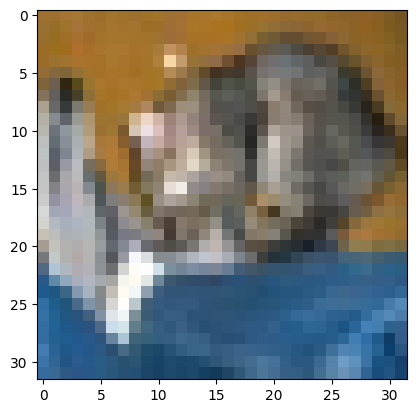

In [16]:
plt.imshow(x_test[0])

In [17]:
print(y_test[0])
print(y_predict[0])
print(y_predict1[0])


[3]
[0.11723137 0.09676584 0.13438287 0.22965053 0.06314732 0.13671353
 0.10526233 0.01505472 0.08052354 0.02126785]
3


In [18]:
ANN_mnist.save('mnist.Neural')

In [19]:
import tensorflow.keras.utils
from tensorflow.keras.utils import load_img, img_to_array
image=load_img("/content/sample_image.webp",target_size=(28,28))
image

FileNotFoundError: ignored

In [ ]:
image.size

In [ ]:
image=image.convert('L')

In [ ]:
image=img_to_array(image)
image.shape

In [ ]:
image=image/255

In [ ]:
plt.imshow(x_test[0],cmap='gray')

In [ ]:

import cv2
import numpy as np


model = load_model('mnist.Neural')

image = cv2.imread('/content/sample_image.webp', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = image / 255.0
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=-1)



In [ ]:
predictions = model.predict(image)

predicted_class = np.argmax(predictions)

print("Predicted class:", predicted_class)